In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import tensorflow as tf
print(tf.__version__)

2.13.0


In [8]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [9]:
print(len(train))
train = train.drop_duplicates(subset=['text'], keep='last')
print(len(train))


7613
7503


<Axes: ylabel='count'>

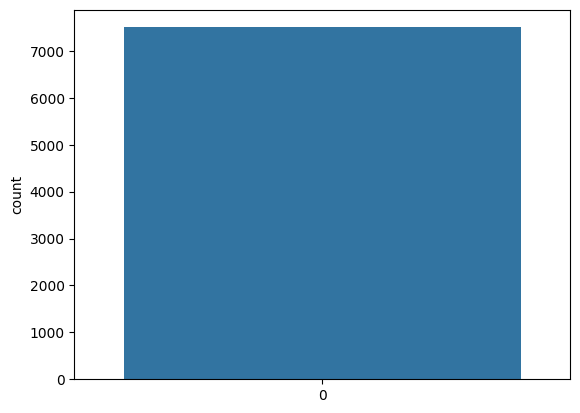

In [12]:
sns.countplot(train['target'])

In [13]:
train["target"].value_counts()

target
0    4307
1    3196
Name: count, dtype: int64

Unique keywords num=222
Unique keywords num=222


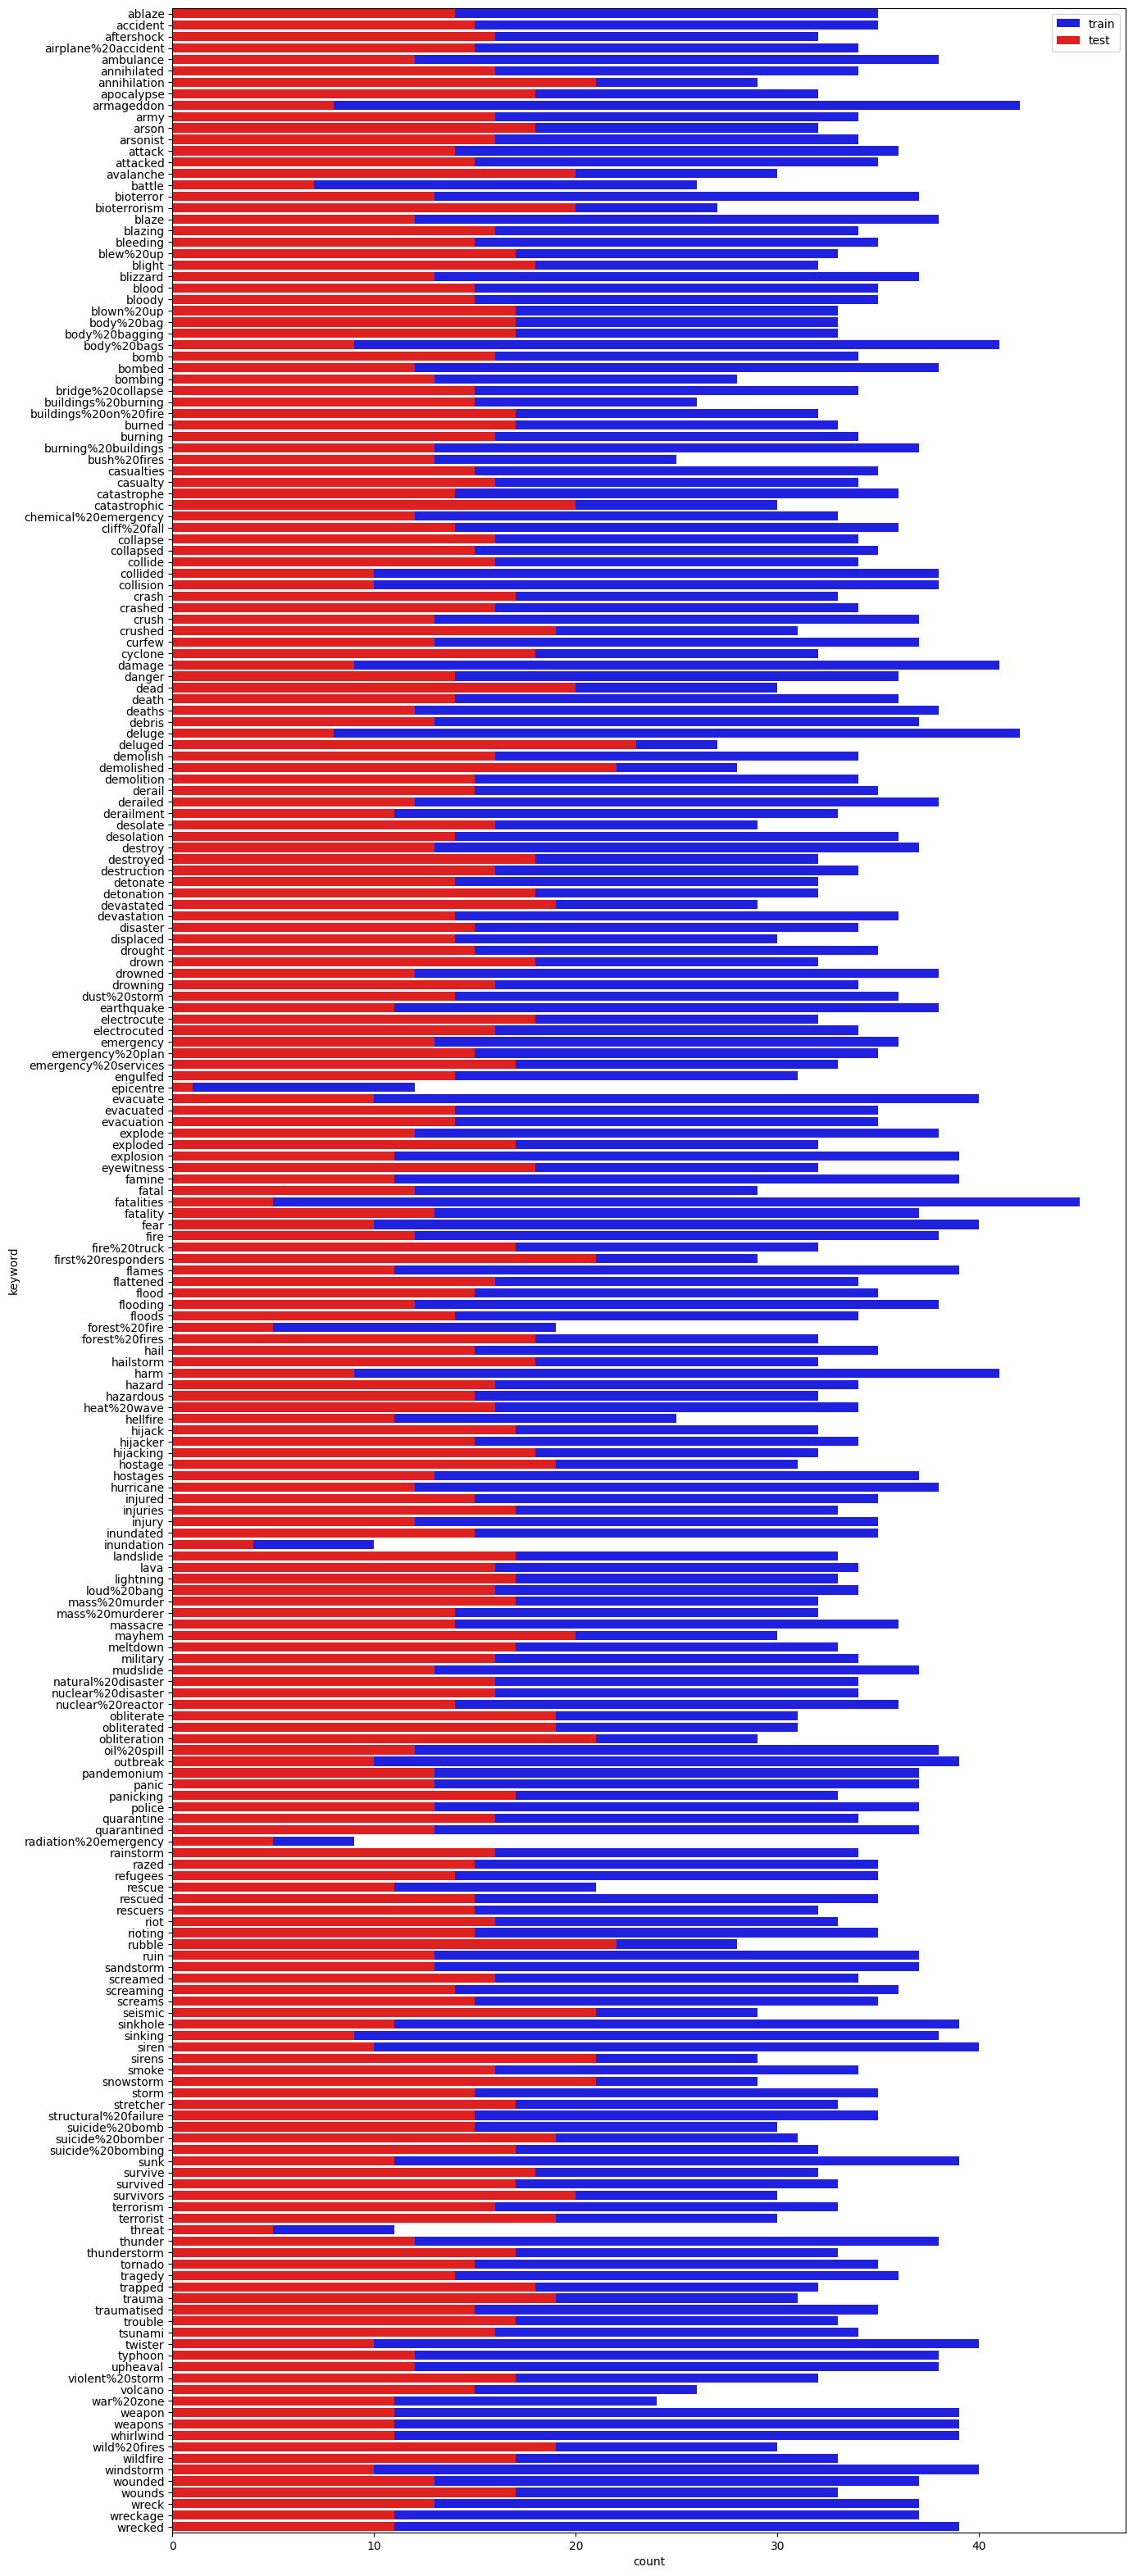

In [14]:
plt.figure(figsize=(15,40))
print(f"Unique keywords num={len(train.keyword.unique())}")
print(f"Unique keywords num={len(test.keyword.unique())}")
sns.countplot(y=train["keyword"], color=(0,0,1),label="train")
sns.countplot(y=test["keyword"], color=(1,0,0),label="test")
plt.legend()

<Axes: xlabel='count', ylabel='keyword'>

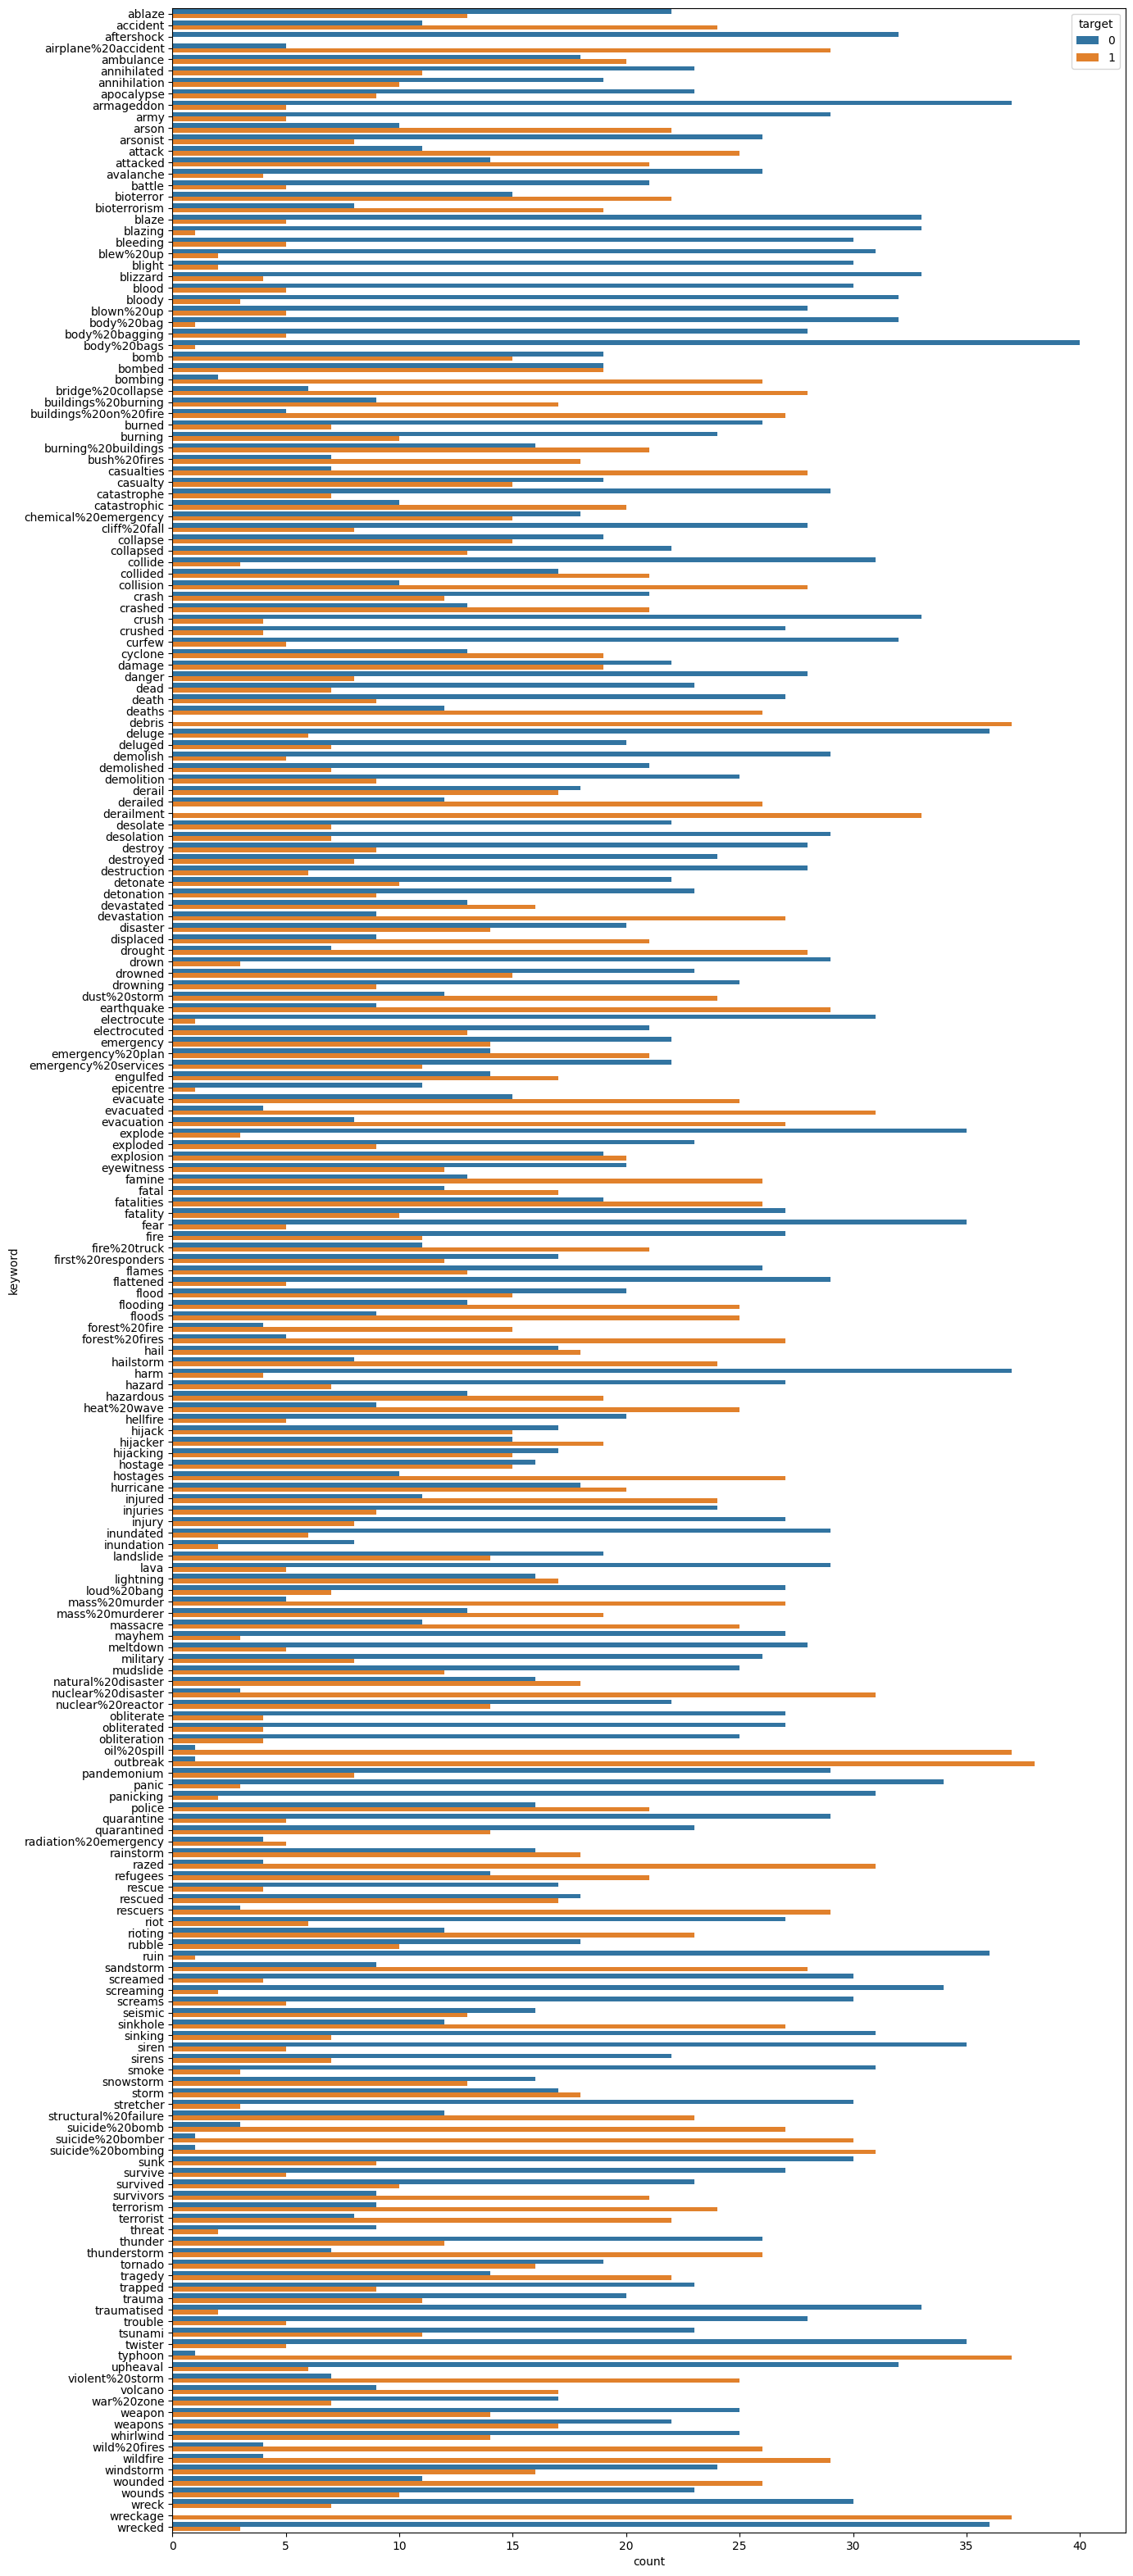

In [15]:
plt.figure(figsize=(15, 40))
sns.countplot(data=train,y="keyword",hue="target")


In [16]:
EMOJIS = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
URLPATTERN        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
USERPATTERN       = '@[^\s]+'
SEQPATTERN   = r"(.)\1\1+"
SEQREPLACE = r"\1\1"


In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordLemm = WordNetLemmatizer()

In [18]:
import re

def preprocess_text(text):
      #text = re.sub(r"http\S+", "", text)
    ### Replacing URL
    text = re.sub(URLPATTERN,' URL',text)
    ### Replacing EMOJI
    for emoji in EMOJIS.keys():
        text = text.replace(emoji, "EMOJI" + EMOJIS[emoji])  
    ### Replacing USER pattern
    #text = re.sub(USERPATTERN,' URL',text)
    ### Removing non-alphabets
    #text = re.sub('[^a-zA-z]'," ",text)
    ### Removing consecutive letters
    #text = re.sub(SEQPATTERN,SEQREPLACE,text)
    #text = text.split()
    #text = [wordLemm.lemmatize(word) for word in text if not word in stopwords.words('english') and len(word) > 1]
    #text = ' '.join(text)
    return text


In [19]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [22]:
%pip install -U tensorflow_text==2.3

ERROR: Could not find a version that satisfies the requirement tensorflow_text==2.3 (from versions: none)
ERROR: No matching distribution found for tensorflow_text==2.3
Note: you may need to restart the kernel to use updated packages.


In [23]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization


ModuleNotFoundError: No module named 'tensorflow_hub'